In [19]:
!pip install gym --user

In [70]:
import math
import numpy as np

In [78]:
R = 0.14
m = 4
Rm = (1 + R/m)**m -1

In [109]:
Rm = 0.14


m = 1
Rm = m*(math.exp(Rc/m) - 1) 

m = 12
Rm = 0.14
R = (1 + Rm/m)**m -1
R

0.14934202920715767

In [110]:
Rm = 0.1
m = 1
Rc = m * np.log(1 + Rm/m)

m = 12
Rm = m*(math.exp(Rc/m) - 1) 
Rm

0.09568968514684517

In [116]:
(1.1**(1/12) - 1) * 12

0.09568968514684517

In [1]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
env = gym.make('FrozenLakeNotSlippery-v0')

In [5]:
env.render()



SFFF
FHFH
FFFH
HFFG


In [6]:
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n
print( "States = ", number_of_states)
print( "Actions = ", number_of_actions)

num_episodes = 1000
steps_total = []
rewards_total = []
egreedy_total = []

States =  16
Actions =  4


In [7]:
# PARAMS 

# Discount on reward
gamma = 0.95

# Factor to balance the ratio of action taken based on past experience to current situtation
learning_rate = 0.9


In [8]:
# exploit vs explore to find action
# Start with 70% random actions to explore the environment
# And with time, using decay to shift to more optimal actions learned from experience

egreedy = 0.7
egreedy_final = 0.1
egreedy_decay = 0.999


In [9]:
Q = torch.zeros([number_of_states, number_of_actions])
Q

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [10]:
for i_episode in range(num_episodes):
    
    # resets the environment
    state = env.reset()
    step = 0

    while True:
        
        step += 1
        
        random_for_egreedy = torch.rand(1)[0]
        

        if random_for_egreedy > egreedy:      
            random_values = Q[state] + torch.rand(1,number_of_actions) / 1000      
            action = torch.max(random_values,1)[1][0]  
            action = action.item()
        else:
            action = env.action_space.sample()
            
        if egreedy > egreedy_final:
            egreedy *= egreedy_decay
        
        new_state, reward, done, info = env.step(action)

        # Filling the Q Table
        Q[state, action] = reward + gamma * torch.max(Q[new_state])
        
        # Setting new state for next action
        state = new_state
        
        # env.render()
        # time.sleep(0.4)
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            egreedy_total.append(egreedy)
            if i_episode % 10 == 0:
                print('Episode: {} Reward: {} Steps Taken: {}'.format(i_episode,reward, step))
            break

Episode: 0 Reward: 0.0 Steps Taken: 10
Episode: 10 Reward: 0.0 Steps Taken: 10
Episode: 20 Reward: 0.0 Steps Taken: 4
Episode: 30 Reward: 0.0 Steps Taken: 8
Episode: 40 Reward: 0.0 Steps Taken: 2
Episode: 50 Reward: 0.0 Steps Taken: 10
Episode: 60 Reward: 0.0 Steps Taken: 2
Episode: 70 Reward: 0.0 Steps Taken: 6
Episode: 80 Reward: 1.0 Steps Taken: 8
Episode: 90 Reward: 1.0 Steps Taken: 10
Episode: 100 Reward: 1.0 Steps Taken: 12
Episode: 110 Reward: 1.0 Steps Taken: 6
Episode: 120 Reward: 1.0 Steps Taken: 13
Episode: 130 Reward: 0.0 Steps Taken: 5
Episode: 140 Reward: 1.0 Steps Taken: 7
Episode: 150 Reward: 1.0 Steps Taken: 7
Episode: 160 Reward: 1.0 Steps Taken: 6
Episode: 170 Reward: 1.0 Steps Taken: 6
Episode: 180 Reward: 0.0 Steps Taken: 4
Episode: 190 Reward: 0.0 Steps Taken: 4
Episode: 200 Reward: 1.0 Steps Taken: 6
Episode: 210 Reward: 1.0 Steps Taken: 6
Episode: 220 Reward: 1.0 Steps Taken: 6
Episode: 230 Reward: 1.0 Steps Taken: 6
Episode: 240 Reward: 1.0 Steps Taken: 7
Episo

In [11]:
print(Q)
        
print("Percent of episodes finished successfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percent of episodes finished successfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

tensor([[0.7351, 0.6983, 0.7738, 0.7351],
        [0.7351, 0.0000, 0.8145, 0.7738],
        [0.7738, 0.8574, 0.7738, 0.8145],
        [0.8145, 0.0000, 0.7738, 0.7738],
        [0.6983, 0.6634, 0.0000, 0.7351],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9025, 0.0000, 0.8145],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.6983],
        [0.6634, 0.9025, 0.9025, 0.0000],
        [0.8574, 0.9500, 0.0000, 0.8574],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9025, 0.9500, 0.8574],
        [0.9025, 0.9500, 1.0000, 0.9025],
        [0.0000, 0.0000, 0.0000, 0.0000]])
Percent of episodes finished successfully: 0.802
Percent of episodes finished successfully (last 100 episodes): 0.88
Average number of steps: 6.43
Average number of steps (last 100 episodes): 6.43


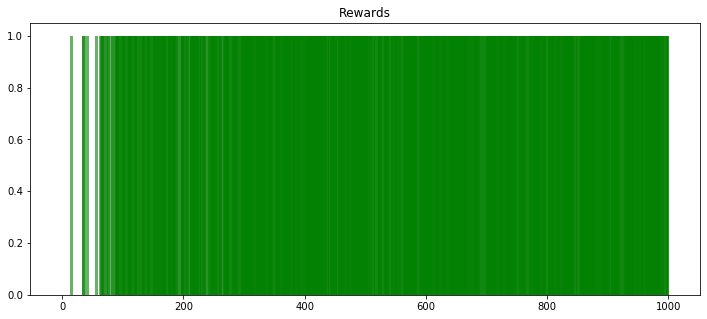

In [12]:
plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green', width=5)
plt.show()


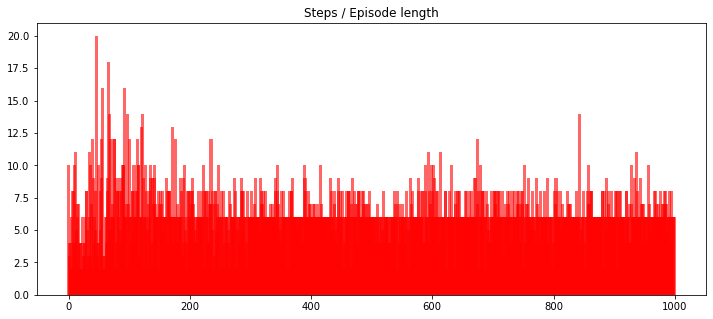

In [13]:
plt.figure(figsize=(12,5))
plt.title("Steps / Episode length")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red', width=5)
plt.show()

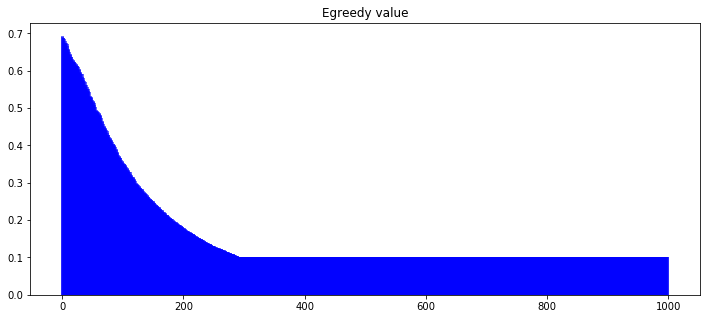

In [14]:
plt.figure(figsize=(12,5))
plt.title("Egreedy value")
plt.bar(torch.arange(len(egreedy_total)), egreedy_total, alpha=0.6, color='blue', width=5)
plt.show()

In [58]:
state = torch.rand(2, requires_grad=True)
weight = torch.rand(2,3)
actions = torch.matmul(state,weight)
probs = torch.nn.Softmax(0)(actions)
mp = probs.mean()

In [65]:
probs = torch.nn.Softmax(0)(torch.tensor([1000.0,2000.0,3000.0]))
probs

tensor([0., 0., 1.])

In [61]:
state.grad

tensor([-9.5023e-09, -1.2256e-08])

In [32]:
torch.diag(probs)

tensor([[0.3540, 0.0000, 0.0000],
        [0.0000, 0.3089, 0.0000],
        [0.0000, 0.0000, 0.3371]])

In [49]:
probs.view(-1,1) * probs
state.view(-1,1)

tensor([[0.3346],
        [0.0088]])

In [39]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [40]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [45]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [42]:
out.backward()

In [43]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [ ]:
x, y, z = int(input()), int(input()), int(input())
if x >= y and x >= z:
    Max = x
if y >= x and y >= z:
    Max = y
if z >= x and z >= y:
    Max = z
if x <= y and x <= z:
    Min = x
if y <= x and y <= z:
    Min = y
if z <= x and z <= y:
    Min = z
s = x + y + z
o = s - Max - Min
print (str(Max) + "\n" + str(Min) + "\n" + str(o))


In [ ]:
a = int(input())
if a % 20 == 1 or a % 20 == 11 and (a - 11)%100 != 0 :
    print(str(a) + str(" программист"))
elif a % 20 == 2 or a % 20 == 12 and (a - 12) % 100 != 0:
    print(str(a) + str(" программиста"))
elif a % 20 == 3 or a % 20 == 13 and (a - 13) % 100 != 0:
    print(str(a) + str(" программиста"))
elif a % 20 == 4 or a % 20 == 14 and (a - 14) % 100 != 0:
    print(str(a) + str(" программиста"))
else:
    print(str(a) + str(" программистов"))
                       

In [ ]:
132%20


In [ ]:
311%20

In [ ]:
861%20

In [ ]:
123%100


In [ ]:
a="123456"
a[0:3]



In [ ]:
b = str(input())
b = int(b)
b1 = b // 1000
b2 = b % 1000

s1 = b1 // 100 + ((b1 % 100)//10)  + b1 % 10
s2 = b2 // 100 + ((b2 % 100)//10)  + b2 % 10

if s1 == s2:
    print("Счастливый")
else:
    print("Обычный")


In [ ]:
a = int(input())
i = a
s = 0
while i != 0:
    s = s + i
    i = int(input())
print(s) 

In [ ]:
a = int(input())
i = a
s = 0
while i != 0:
    s = s + i
    i = int(input()) 
    if i == 0
        print(0)
print(s) 

In [ ]:
a = int(input())
b = int(input())
i = a
j = b

while i != 0 and j != 0:
    if i > j:
        i = i % j
    else:
        j = j % i

print(int((a*b)/(i + j)))

  

In [ ]:
i = 0
s = 0
while i < 10:
    i = i + 1
    s = s + i
    if s > 15:
        continue
    i = i + 1
print(i)    

i = 0
while i <= 100:
    i = int(input())
    if i < 10:
        continue
    if i > 100:  
        break
    print(i)    

In [ ]:
2+2


a = int(input())
b = int(input())
c = int(input())
d = int(input())

for i in range(c, d+1):
    print("\t", i, end='')
    for j in range(a, b+1):
        print(j)
    

In [ ]:
2+2

In [ ]:
a = int(input())
b = int(input())
c = int(input())
d = int(input())

#for i in range(c, d+1):
 #   print("\t", i, end='')
#print()    
#for j in range(a, b+1):
 #print(j)



In [ ]:
a = int(input())
b = int(input())
c = int(input())
d = int(input())


for r in range(c, d+1):
    print("\t", r, end='')
print()

for i in range(a, b+1):
    print( i, end='')
    
    for j in range(c, d+1):
        print("\t", i*j, end='')
    print()    

In [ ]:

2


In [ ]:
2+2

In [ ]:
a = int(input())
b = int(input())

s = 0
k = 0

for i in range(a, b+1):
    if i %3 == 0:
        s = s + i
        k = k + 1
        
print(s/k)

In [ ]:
st = str(input())
st = st.lower()

C = int()
G = int()
C = st.count('c')
G = st.count('g')
ds = 0
for i in st:
    ds = ds+1
print(((C + G)/ ds) * 100)


In [ ]:
s = 'aTGcc'
print(s.lower())

In [ ]:
s = 'abcdefghijk'
print(s[3:6])
print(s[:6])
print(s[3:])
print(s[::-1])
print(s[-3:])
print(s[:-6])
print(s[-1:-10:-2])

In [ ]:
st = str(input())

p = st[0]
s = 1
for i in st[1:]:
    if p == i:
        s = s + 1
        p = i
        
    else:
        print(str(p) + str(s), end='')
        p = i
        s = 1
print(str(p) + str(s))
            

In [ ]:
2+2

In [ ]:
2+2

In [ ]:
students = ['Ivan', 'Masha', 'Sasha']
students += ['Olga']
students += 'Olga'
print(students)

In [ ]:
a = [1, 2, 3]
b = a
# значения списка b?
print(b)

a[1] = 10
# значения списка b?
print(b)
b[0] = 20
# значения списка a?

print(a)
a = [5, 6]
# значения списка b?
print(b)

In [ ]:
txt = "welcome to the jungle"

x = txt.split()

print(x) 

In [ ]:
st = str(input())
sp = [int(i) for i in st.split()]
s = 0
for j in sp:
    s = s + j
print(s)




In [ ]:
2+2

In [ ]:
sp = [int(i) for i in input().split()]
s = 0

ind = 0
for i in sp:
    if len(sp)== 1:
        s = sp[0]    
    elif ind == 0:      
        s = sp[1] + sp[-1]       
    elif  ind == len(sp) - 1:
        s = sp[0] + sp[-2]
    else:
        s = sp[ind -1] + sp[ind + 1]        
    print(s, end=' ')
     
    ind = ind + 1   
                

In [ ]:
2+2

In [ ]:
sp = [int(i) for i in input().split()]
#sp.sort() 

for i in set(sp):
      if sp. count(i)> 1:
        print (i, end=' ')  



In [ ]:
2+2

In [ ]:
sv = 0
sk = 0
f = True
while f == True:
    a = int(input())
    sv = sv + a
    sk = sk + (a * a)
        #print(sv, sk)
    if sv == 0:
        print(sk)
        f = False
    
            
            
        
        

In [ ]:
-3*-3


In [ ]:
a = int(input())
i = 1
sp = []

for i in range(1, a + 1):
    for x in range(i):        
        sp.append(i)
print(*sp)
sp1 = (sp[0: a])
for j in range(len(sp1)):
    print(sp[j], end=' ')
           
    


In [ ]:
a = [1] * 3
b = str(a)
print(b)

In [ ]:
#a= [print(5, end = ' ') for x in range(5)]
' '.join([str(i)] *5)


In [ ]:
i = int(input())

for x in i:
    print(i, end=' ')
   

In [ ]:
lst = [int(i) for i in input().split()]
x = int(input())



In [ ]:
ind = 0
y = 0

for j in lst:
    if j == x:
        y = y + 1
        print(ind, end=' ')
        ind = ind + 1
    elif j != x:
        ind = ind +1   
        
if y == 0:
    print('Отсутствует')
        
        

In [ ]:
a = [[0 for j in range(5)] for i in range(5)]

In [ ]:
a

In [ ]:
a = int(input())
b = int(input())
c = int(input())
d = int(input())


for r in range(c, d+1):
    print("\t", r, end='')
print()

for i in range(a, b+1):
    print( i, end='')
    
    for j in range(c, d+1):
        print("\t", i*j, end='')
    print() 
    

In [ ]:
2+2


In [ ]:
n = int(input())
sp = [i+1 for i in range(n * n)]
print(sp)
print(*sp[0: n])

#for j in sp[n: ]:
    
    
    


In [ ]:
def f(n):
    return n * 10 + 5

In [ ]:
[i for i in range(8) if i%2!=0]
[i for i in range(8) if i%2!=0]
lst = [10, 5, 8, 3, 1]
[x for x in lst if x%2 == 0]

In [ ]:
def md(lst):
    xx = [x // 2 for x in lst if x%2 == 0]
    return xx

lst = [10, 5, 8, 3, 1,16]
xx = md(lst)
#print('ww', lst)  
print(lst, xx)

del lst[:]

In [ ]:
def modify_list(l):
    # put your python code here
    #a = l
    print(l)
    for i in l:
        if i %2 != 0:
            l.remove(i)
        print('h ', l)
        
    
    



           

In [ ]:
lst = [10, 5, 8, 3, 1]
modify_list(lst)
print('ww', lst) 

In [ ]:
2+2

In [ ]:
st = str(input())
d = {}
d = eval(st)

print(d)


In [ ]:
p = st[0]
s = 1
for i in st[1:]:
    if p == i:
        s = s + 1
        p = i
        
    else:
        print(str(p) + str(s), end='')
        p = i
        s = 1
print(str(p) + str(s))

In [ ]:
n = str(input())
m = [] #инициализация списка
m.append([str(s.lower()) for s in n.split()]) 
d = {} #инициализация пустого словаря
li, lj = len(m), len(m[0])
print(len(m[0]))
print(len(m))
for i in range(li):
    for j in range(lj):
        p = m[i][j]
        if p in d:
            d[p]+=1
        else:
            d[p] = 1
for key,value in d.items():
    print(key,value)

In [ ]:
2+2
